# EX16 curve-fitting

## Problem #1

We have a data file './data/fit.dat'. It contains 2 columns, which are xdata and ydata. In this exercise, you will need to find a function to fit the data.

In [1]:
%less ./data/fit.dat

0.000000000000000000e+00 0.000000000000000000e+00
3.173325912716962738e-01 4.651957748269276216e+00
6.346651825433925476e-01 1.619618432379962414e+01
9.519977738150888769e-01 1.824684777859438611e+00
1.269330365086785095e+00 -8.436473154249684470e+00
1.586662956358481313e+00 -1.246913225569769956e+01
1.903995547630177754e+00 -2.249263505124744711e+00
2.221328138901873750e+00 1.699141856384305260e+00
2.538660730173570190e+00 7.821568152189590784e+00
2.855993321445266631e+00 7.183293016652957164e+00
3.173325912716962627e+00 -7.339469871442861892e-01
3.490658503988659067e+00 -5.423037712609288796e+00
3.807991095260355507e+00 -1.377766377880915050e+00
4.125323686532051504e+00 -1.287830891196640515e+00
4.442656277803747500e+00 4.782734063036548022e+00
4.759988869075444384e+00 -4.139834091001888816e-01
5.077321460347140381e+00 2.909105650175377811e+00
5.394654051618836377e+00 -3.263540497761802328e+00
5.711986642890533261e+00 -6.698745852258455535e+00
6.029319234162229257e+00 -4.247782074569

# Step 1: 
- read the data
- plot the data

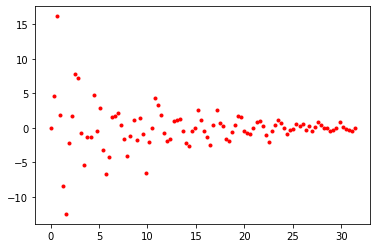

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
                                       
x,y=np.loadtxt('./data/fit.dat',unpack=True)
plt.plot(x,y,'r.')

# Step 2:

- Write a program using the SciPy function scipy.optimize.curve_fit to fit the equation to the data. Do not consider the uncertainty of y-axis this time, and do not give initial values of the constants. Your program should plot the data along with the fitting function using the optimal values of the fitting parameters.
- Print out fitting residual. The fitting resitual is defined as:
\begin{align}
residual=\sqrt{[\sum_{i=1}^n(y^i-y_{fit}^i)^2]/n}
\end{align}
where $y^i$ is the observed y-data, and $y_{fit}^i$ is the modeled y-data computed from the fitting function, $n$ is the number of data points

[11.54832855  3.00148691  0.14339256] 1.530647004425453


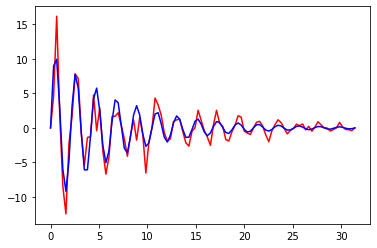

In [3]:
def func(t,A,B,C):
    return A*np.sin(t*B)*np.exp(-t*C)
popt,pcon=curve_fit(func,x,y)
y_fit=func(x,*popt)
plt.plot(x,y,'r')
plt.plot(x,y_fit,'b')
residual=np.sqrt(((y-y_fit)**2).sum()/y.size)
print(popt,residual)

## Problem #2

Fit the following data with the function of
\begin{align}
d(t) = A (1+B\,\cos\omega t) e^{-t^2/(2\tau^2)} + C
\end{align}

Find the constants of A, B, C, tau and omega

- HINT: in this problem, you will need carefully chose initial values for these constants by using the 'p0' option, otherwise, you can not fit the data well.

In [6]:
%less ./data/spec.dat

0.2 41.1
1.4 37.2
2.7 28.3
3.9 24.8
5.1 27.8
6.4 34.5
7.6 39.0
8.8 37.7
10.1 29.8
11.3 22.2
12.5 22.3
13.8 26.7
15.0 30.4
16.2 32.6
17.5 28.9
18.7 22.9
19.9 21.7
21.1 22.1
22.4 22.3
23.6 26.3
24.8 26.2
26.1 21.4
27.3 20.0
28.5 20.1
29.8 21.2
31.0 22.0
32.2 21.6
33.5 21.0
34.7 19.7
35.9 17.9
37.2 18.1
38.4 18.9


[14.77995819  0.59714817 18.12159658 16.18042145  0.78011183] 0.7818971757715388


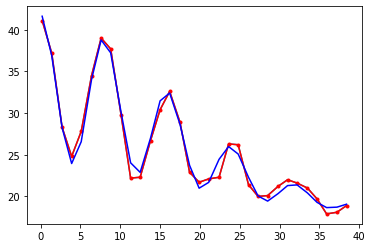

In [4]:
x,y=np.loadtxt('./data/spec.dat',unpack=True)
plt.plot(x,y)
plt.plot(x,y,'r.')
def func(t,A,B,C,tau,omega):
    return A*(1+B*np.cos(omega*t))*np.exp(-t**2/2/tau**2)+ C

popt,pcon=curve_fit(func,x,y,p0=[1,0,1,1,1])
y_fit=func(x,*popt)
plt.plot(x,y,'r')
plt.plot(x,y_fit,'b')
residual=np.sqrt(((y-y_fit)**2).sum()/y.size)
print(popt,residual)